$$ Machine \space Learning \space 1 \space Project $$
$$ Obesity \space Risk $$

<h1 style="background-color: #32127a; font-family: newtimeroman; font-size: 250%; color: white; border-radius: 80px 20px; padding: 25px; text-align: center;">
  <b>Obesity Risk Classification</b>
</h1>

<font color=#E1B12D> **About the Dataset :** <font><br>
<font color=black>The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was generated from a deep learning model trained on the [Obesity risk dataset](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster).

<font color=#E1B12D> **Aim of the Project:** <font><br>
<font color=black>The goal of this project is to develop a classification model that can accurately predict the obesity level of individuals using features such as age, weight, height, eating habits, physical activity, and transportation mode. We will analyze the dataset, perform feature engineering, apply different classification algorithms, and compare their performance to determine the best model.

#### **Dataset Explanation**
The dataset contains various personal, behavioral, and physiological features related to obesity classification. Below is a description of the columns in the dataset:

| Column Name                      | Description |
|----------------------------------|-------------|
| **id**                           | Unique identifier for each individual. |
| **Gender**                       | The gender of the individual (Male/Female). |
| **Age**                           | Age of the person in years. |
| **Height**                        | Height of the individual in meters. |
| **Weight**                        | Weight of the individual in kilograms. |
| **family_history_with_overweight** | Whether the individual has a family history of overweight (yes/no). |
| **FAVC**                          | Frequent consumption of high-calorie food (yes/no). |
| **FCVC**                          | Frequency of vegetable consumption (scale from 1 to 3). |
| **NCP**                           | Number of main meals consumed per day. |
| **CAEC**                          | Frequency of eating between meals (Sometimes, Frequently, Always, No). |
| **SMOKE**                         | Whether the person smokes (yes/no). |
| **CH2O**                          | Daily water consumption in liters. |
| **SCC**                           | Whether the individual monitors calorie consumption (yes/no). |
| **FAF**                           | Physical activity frequency (scale from 0 to 3). |
| **TUE**                           | Time spent using technology devices (scale from 0 to 2). |
| **CALC**                          | Alcohol consumption frequency (Sometimes, Frequently, Always, No). |
| **MTRANS**                        | Mode of transportation used (Public Transportation, Automobile, Walking, etc.). |
| **NObeyesdad**                    | Target variable: Obesity classification level (e.g., Normal Weight, Obesity Type I, Overweight Level II, etc.). |

### Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_auc_score
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

--------------------------------
### load Data

In [ ]:
train = pd.read_csv('train.csv')


In [ ]:
test  = pd.read_csv('test.csv')

----------------

### Exploratory Data Analysis (EDA)

In [ ]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

About Data:
- The train dataset contains 20758 rows and 18 columns
- There are no missing
- Target Variable - NObeyesdad

In [ ]:
# statistical tool for numerecal data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [ ]:
# statistical tool for categorical data
train.describe(include='object').T

,count,unique,top,freq
Gender,20758,2,Female,10422
family_history_with_overweight,20758,2,yes,17014
FAVC,20758,2,yes,18982
CAEC,20758,4,Sometimes,17529
SMOKE,20758,2,no,20513
SCC,20758,2,no,20071
CALC,20758,3,Sometimes,15066
MTRANS,20758,5,Public_Transportation,16687
NObeyesdad,20758,7,Obesity_Type_III,4046


------------------
### Visual Analysis

In [ ]:
def visualize(data, column_name):
    category_counts = data[column_name].value_counts()
    plt.figure(figsize=(14, 7))

    # Pie chart
    plt.subplot(1, 2, 1)
    wedges, texts, autotexts = plt.pie(
        category_counts,
        labels=category_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops=dict(width=0.3)
    )
    plt.title(f'Distribution of {column_name}')
    plt.subplot(1, 2, 2)
    #Bar plot
    sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
    plt.title(f'Counts by {column_name} Categories')
    plt.xlabel('Counts')
    plt.ylabel('Categories')
    plt.tight_layout()
    plt.show()

### Let's visualize each of the variables:
### Univariate
- Targe variable

- what is the Distribution of Obesity level? Are certain obesity levels more frequent?

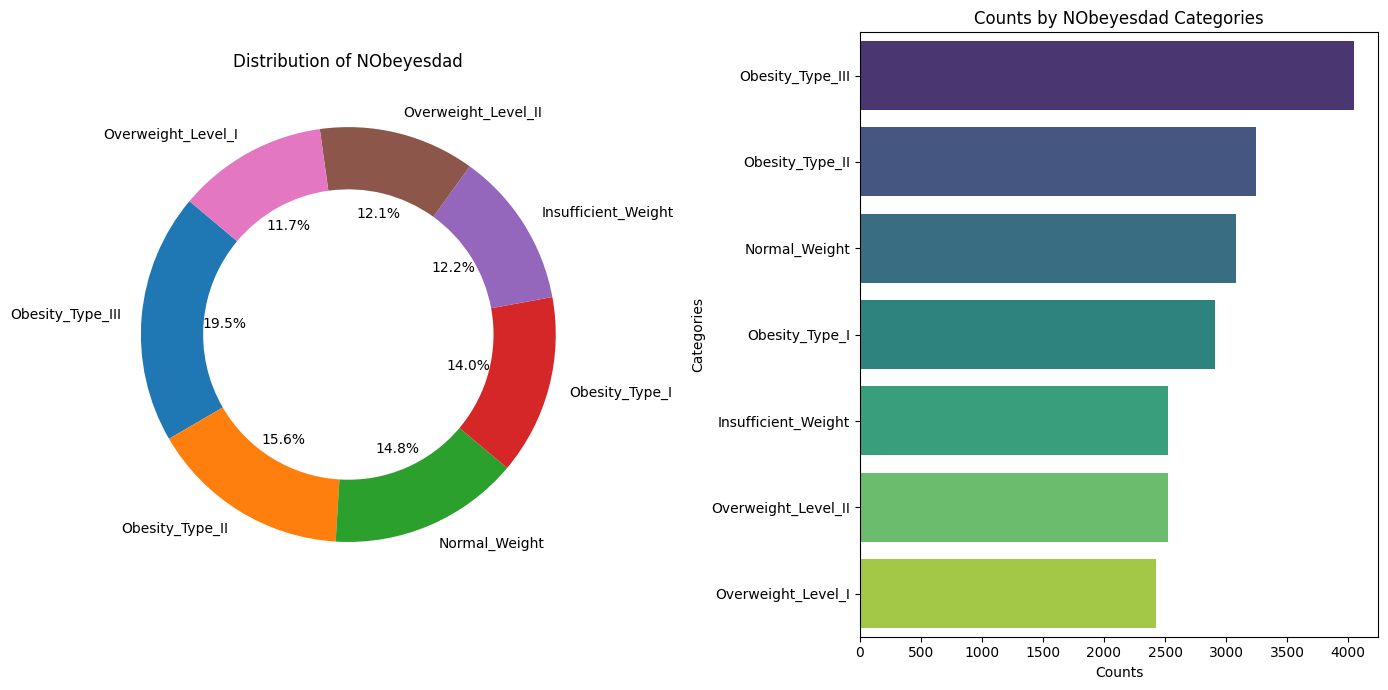

In [ ]:
visualize(train, 'NObeyesdad')

- We have highest number of people with <b>Ovesity_Type III</b> having share of <b>19.5%</b> this is mean in  this dataset  most of people suffer from extreme obesity.
- Overweight_Level_I and Overweight_Level_II have the lowest counts. This suggests fewer individuals are classified as being slightly overweight compared to other categories.

-----
- Are there more males or females in the dataset?

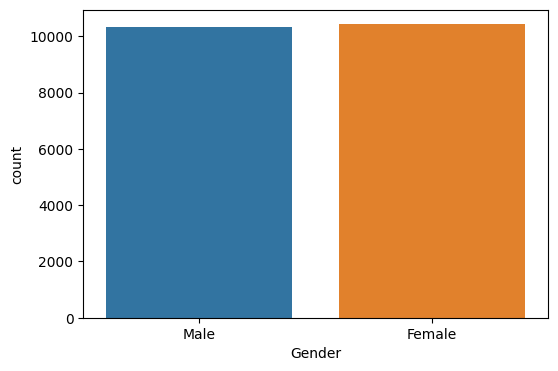

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=train , palette="tab10")
plt.show()

- Gender Distribution is fairly equal in Data set

----
- What is the distribution of Age , Height , Weight individuals in the dataset?

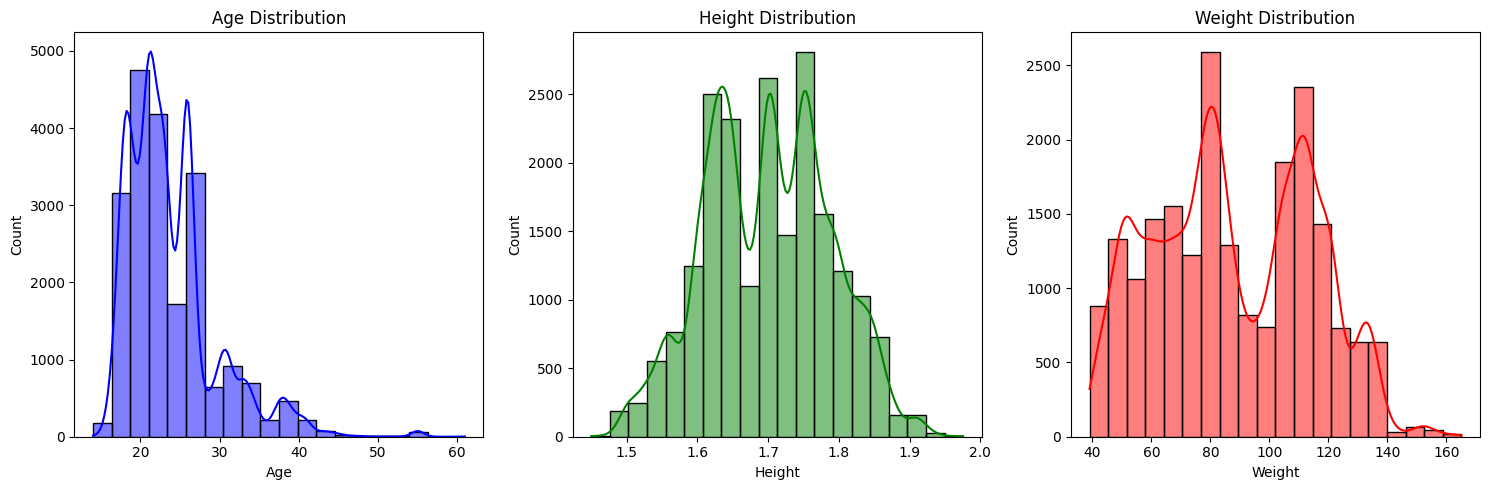

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(train['Age'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Age Distribution")

sns.histplot(train['Height'], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title("Height Distribution")

sns.histplot(train['Weight'], bins=20, kde=True, ax=axes[2], color='red')
axes[2].set_title("Weight Distribution")

plt.tight_layout()
plt.show()

Insights : <br>

1-Age
- The distribution is right-skewed, The dataset is dominated by younger individuals (ages 18–30), that mean we will focuse on obesity in adult people than  older <br>
2- Height <br>
- The distribution is normal distribution , Most individuals have average heights (1.6–1.8 meters)<br>
3- Weight<br>
- The weight distribution appears normal with some skewness, with distinct peaks around 60 kg, 80 kg, and 110 kg.
- Range: The majority of individuals have a weight between 40 kg and 120 kg.
- Weight is directly related to obesity levels. Peaks in the weight distribution likely correspond to obesity categories:
- 60 kg → Normal weight or Insufficient weight.
- 80 kg → Overweight Level I or II.
- 110 kg → Obesity Type I, II, or III.

----
- What percentage of individuals have a family history of being overweight?

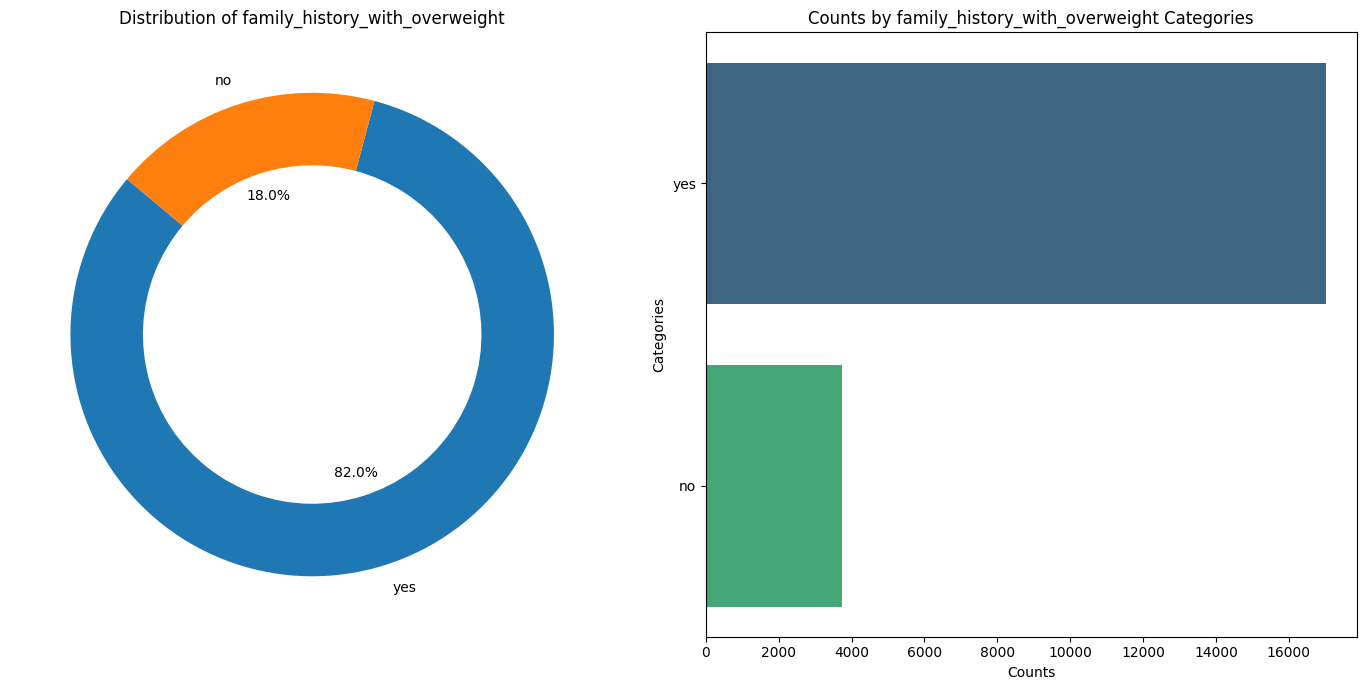

In [ ]:
visualize(train , 'family_history_with_overweight')

- 82.0% people have a family history with Overweight

---
- What percentage of individuals frequently consume high-calorie foods?

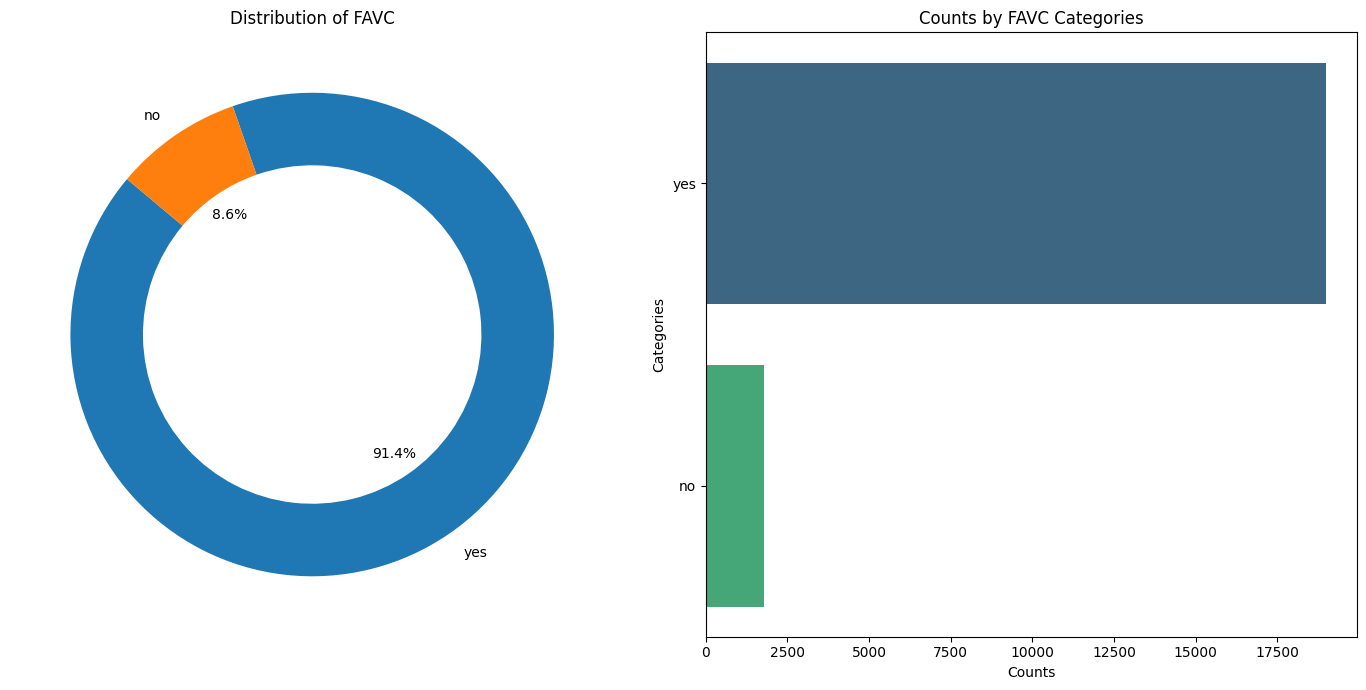

In [ ]:
visualize(train , 'FAVC')

- 91.4% people Frequently consume high caloric food

---
- What are the most common modes of transportation in the dataset?

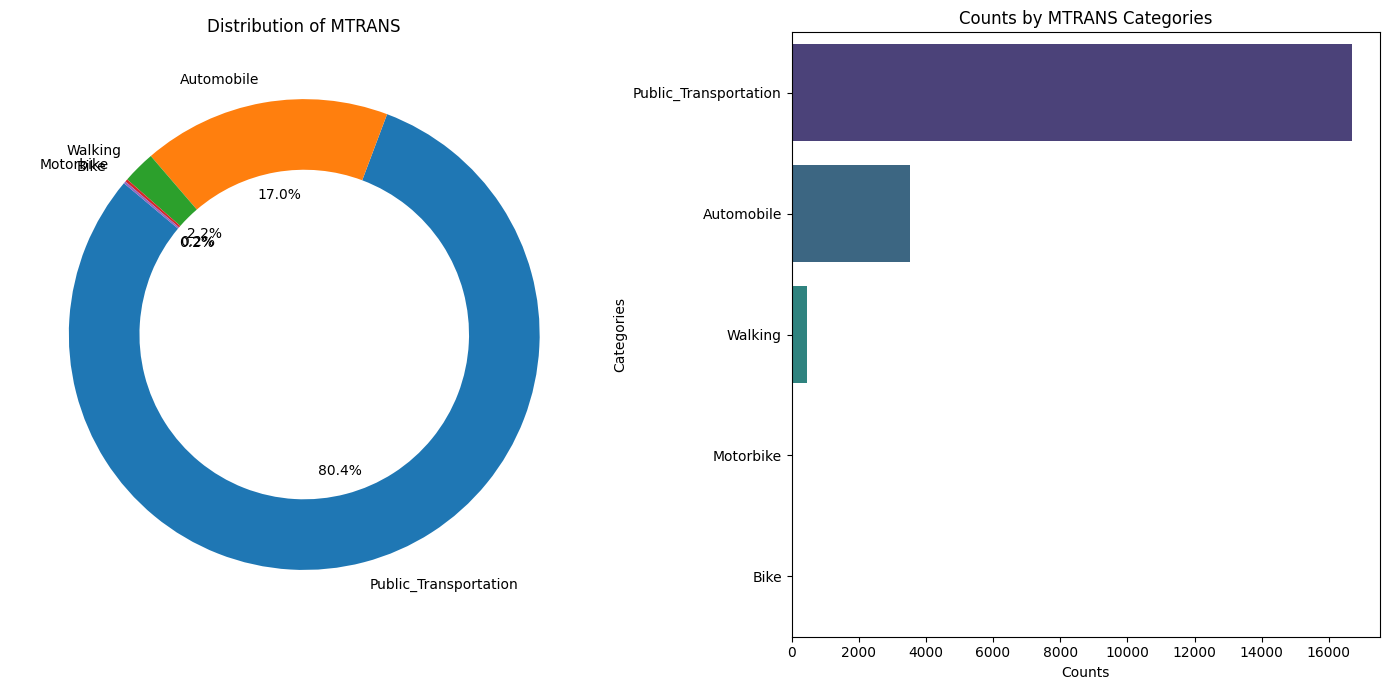

In [ ]:
visualize(train ,'MTRANS')

- 97.6% use some form of vehicles while only ~2.4% prefers walking/using bike That's concerning!

---
### Bivariate

- Are males or females more prone to obesity?

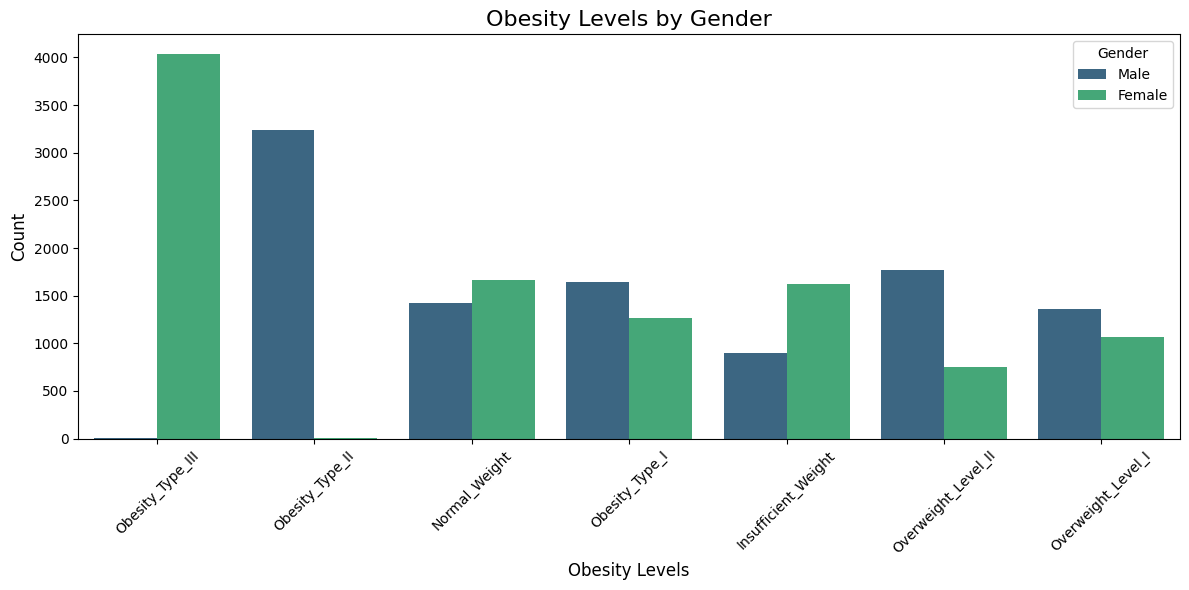

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=train,
    x='NObeyesdad',
    hue='Gender',
    palette='viridis',
    order=train['NObeyesdad'].value_counts().index
)
plt.title('Obesity Levels by Gender', fontsize=16)
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender', loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Gender Differences in Obesity: Females are more likely to be in the extremes, either in the highest obesity level or in insufficient weight.
- Moderate Levels: Males tend to dominate in moderate obesity categories.
- Overweight categories show that male highest than femal

---
 Is obesity more common in specific age groups?

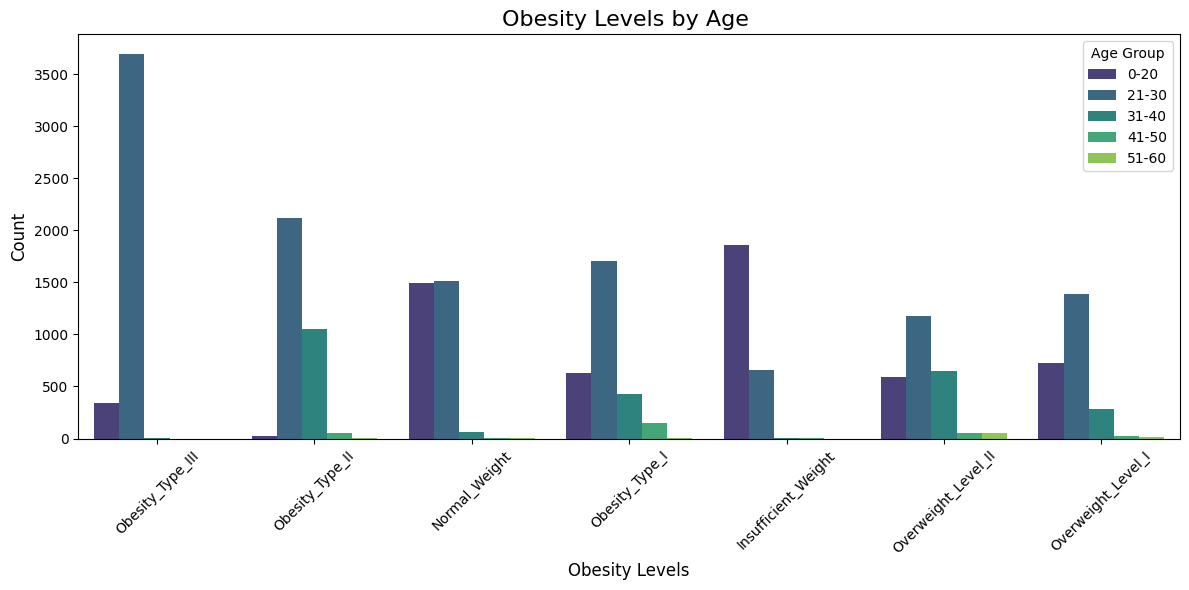

In [ ]:
bins = [0, 20, 30, 40, 50, 60]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60']
train['Age_Group'] = pd.cut(train['Age'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))

sns.countplot(
    data=train,
    x='NObeyesdad',
    hue='Age_Group',
    palette='viridis',
    order=train['NObeyesdad'].value_counts().index
)

plt.title('Obesity Levels by Age ', fontsize=16)
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Age Group', loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



- The 21-30 age group appears to have the highest representation in several obesity categories, particularly in Obesity_Type_III and Obesity_Type_II.

---
- How do obesity levels vary based on frequent consumption of high-calorie foods (FAVC)?

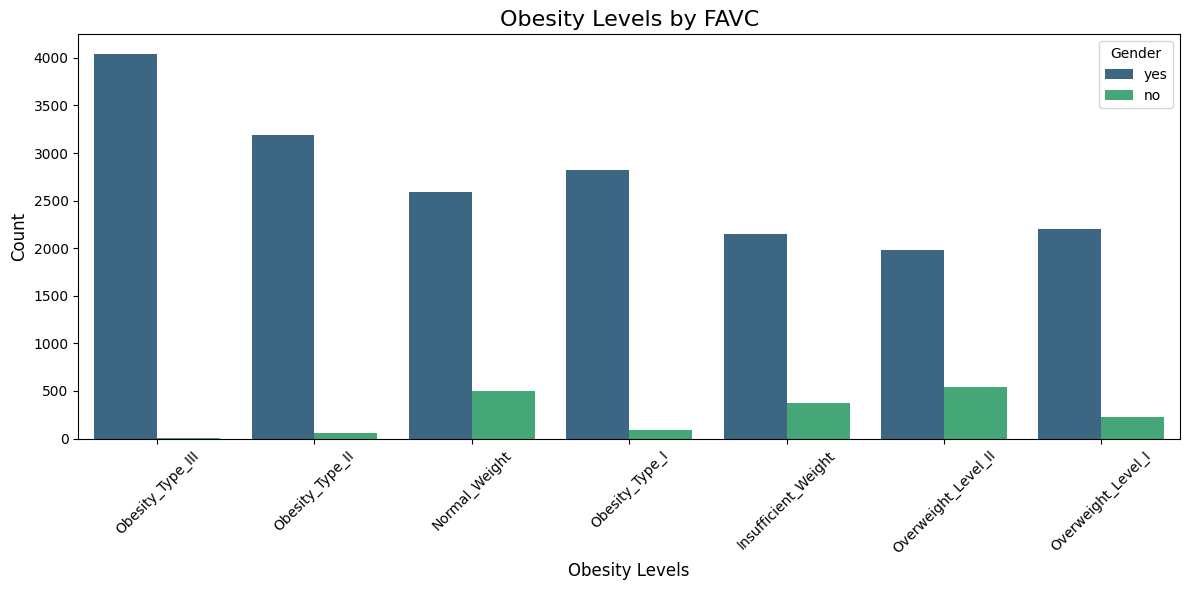

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=train,
    x='NObeyesdad',
    hue='FAVC',
    palette='viridis',
    order=train['NObeyesdad'].value_counts().index
)
plt.title('Obesity Levels by FAVC', fontsize=16)
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender', loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Individuals who frequently consume high-calorie food (yes) dominate all obesity categories.
- The most notable categories are Obesity_Type_III and Obesity_Type_II, where the count for yes is significantly higher than no.

----
- Is there a noticeable trend in FAF as obesity severity increases or decreases?


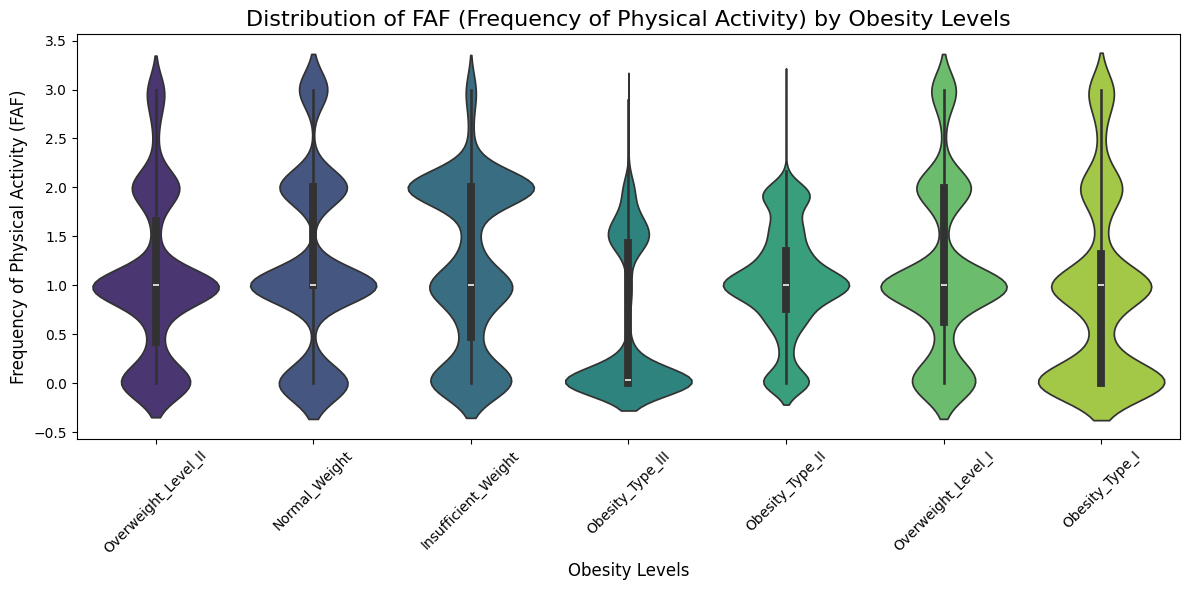

In [ ]:
plt.figure(figsize=(12, 6))

sns.violinplot(
    data=train,
    x='NObeyesdad',
    y='FAF',
    palette='viridis'
)

plt.title('Distribution of FAF (Frequency of Physical Activity) by Obesity Levels', fontsize=16)
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Frequency of Physical Activity (FAF)', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




- Individuals with normal weight or overweight levels tend to have a higher frequency of physical activity.
- As obesity levels increase (e.g., Obesity Type I, II, III), the median FAF appears to decrease slightly.
- Some categories (e.g., Obesity Type II) show outliers with higher FAF values, suggesting that certain individuals maintain high activity levels despite higher obesity levels.-

---
- How does the time spent using technology (TUE) relate to obesity levels?

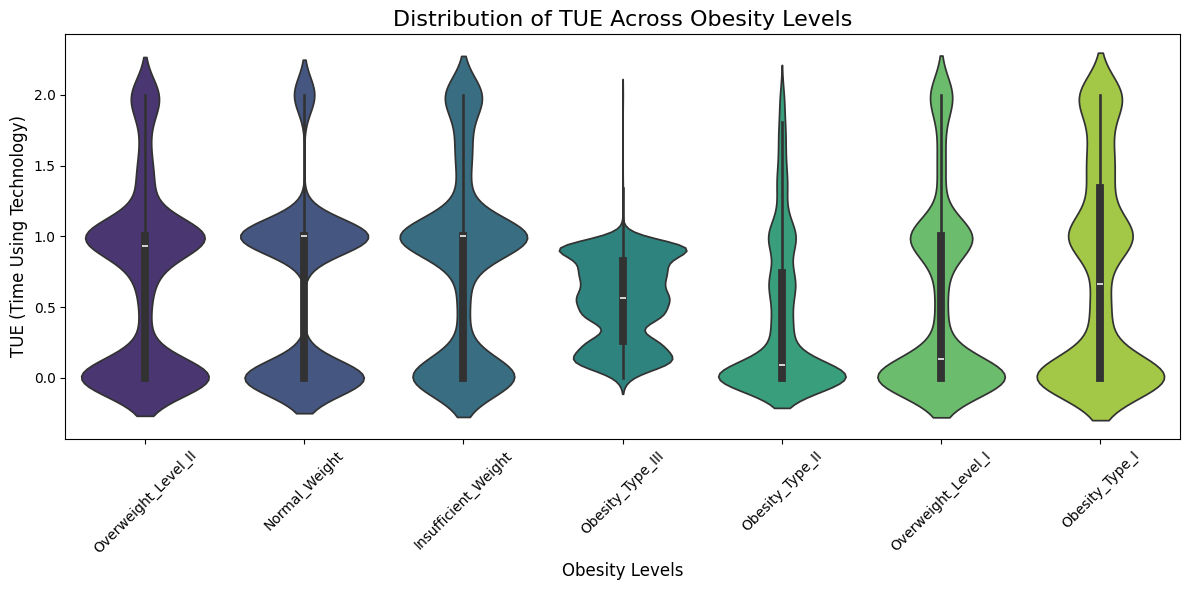

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=train, x='NObeyesdad', y='TUE', palette='viridis')
plt.title('Distribution of TUE Across Obesity Levels', fontsize=16)
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('TUE (Time Using Technology)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Normal Weight and Overweight Levels have a more balanced distribution of TUE, with medians centered around 1.
- For Obesity Types I, II, and III, the TUE values are slightly skewed, indicating a decrease in technology usage as obesity severity increases.

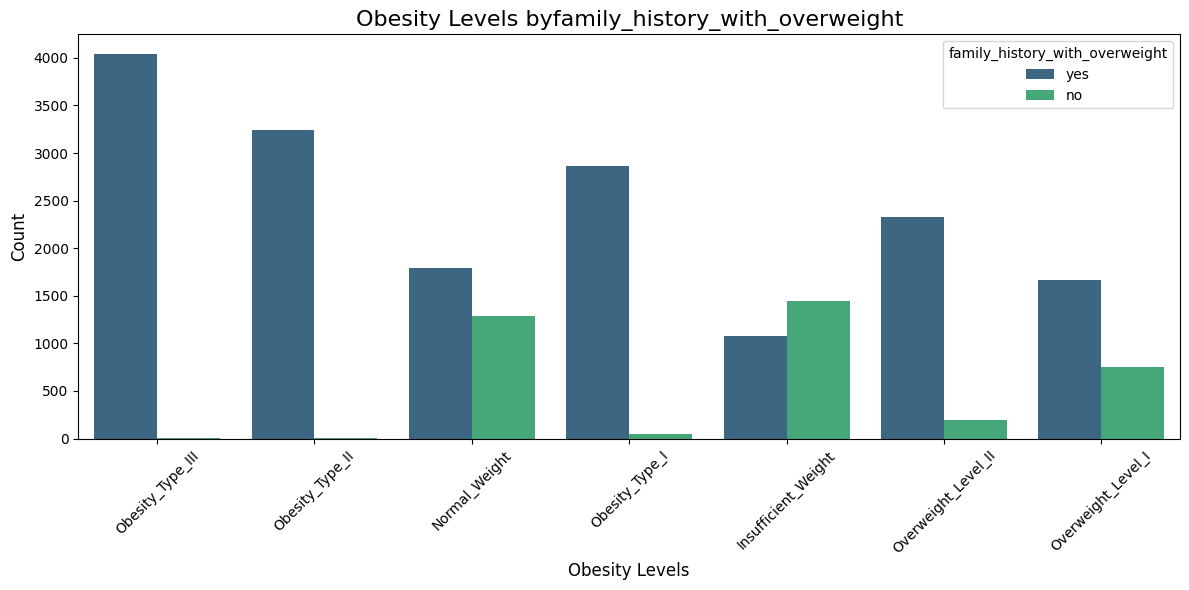

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=train,
    x='NObeyesdad',
    hue='family_history_with_overweight',
    palette='viridis',
    order=train['NObeyesdad'].value_counts().index
)
plt.title('Obesity Levels byfamily_history_with_overweight', fontsize=16)
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='family_history_with_overweight', loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Individuals with a family history of being overweight ("yes") have significantly higher counts in the categories of Obesity_Type_III, Obesity_Type_II, and Obesity_Type_I.
- Individuals without a family history ("no") tend to have higher counts in the Normal Weight and Insufficient Weight categories.

---
- How do obesity levels vary with the frequency of food consumption between meals (CAEC)?

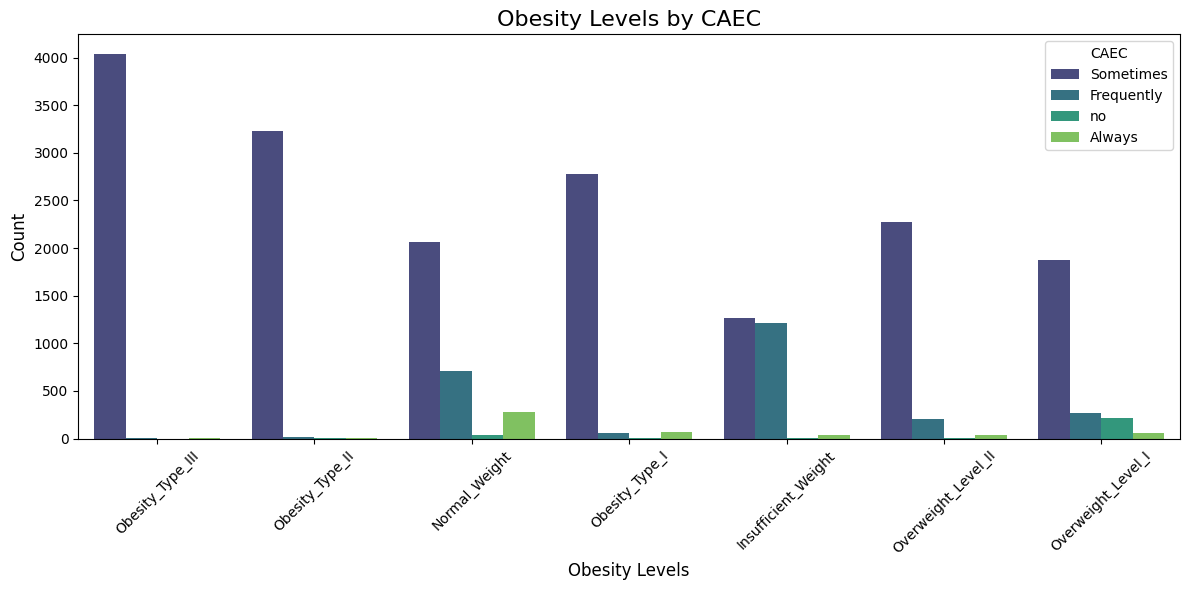

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=train,
    x='NObeyesdad',
    hue='CAEC',
    palette='viridis',
    order=train['NObeyesdad'].value_counts().index
)
plt.title('Obesity Levels by CAEC', fontsize=16)
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='CAEC', loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The "Sometimes" category is the most prevalent across all obesity and weight levels, suggesting that occasional snacking between meals is common among individuals regardless of their weight category.
- The higher counts in Obesity Types III, II, and I for "Sometimes" might indicate a potential relationship between occasional snacking and higher obesity levels.
- The "No" and "Always" categories have minimal representation, implying that these behaviors are less frequent in the population .

---
- How do obesity levels vary depending on whether individuals monitor their calorie consumption (SCC)?

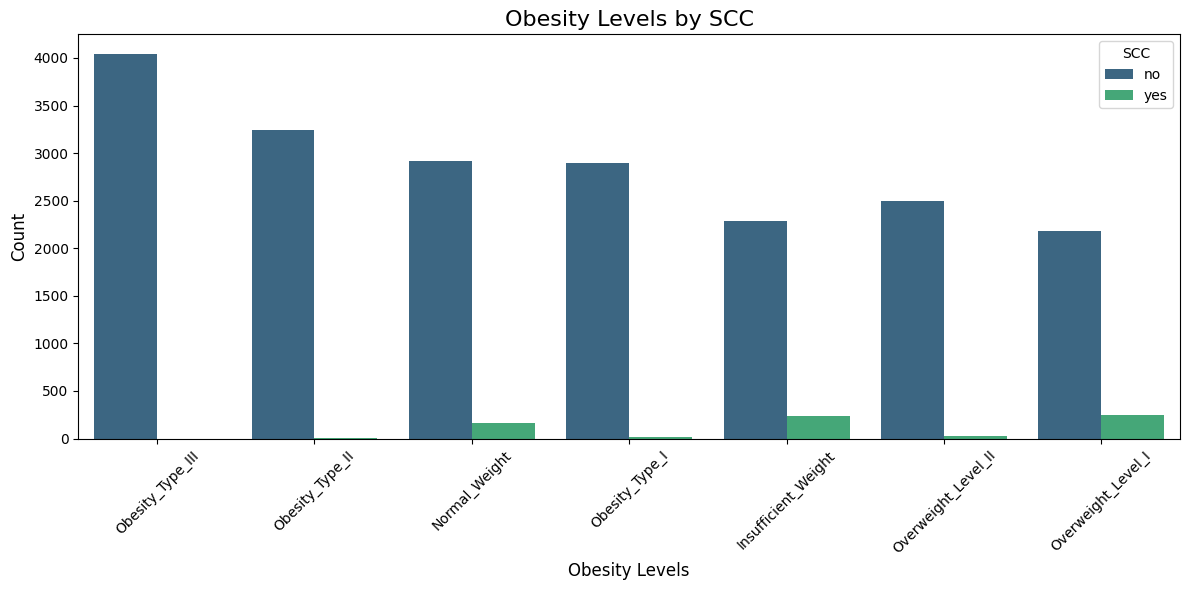

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=train,
    x='NObeyesdad',
    hue='SCC',
    palette='viridis',
    order=train['NObeyesdad'].value_counts().index
)
plt.title('Obesity Levels by SCC', fontsize=16)
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='SCC', loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The "No" category for SCC (Calories Consumption Monitoring) has significantly higher counts across all obesity and weight levels compared to the "Yes" category.
- This indicates that the majority of individuals in the dataset do not monitor their calorie consumption.
- A significant majority of individuals, particularly those with higher obesity levels, do not monitor their calorie intake

---
- Is there a relationship between alcohol consumption habits and obesity levels?

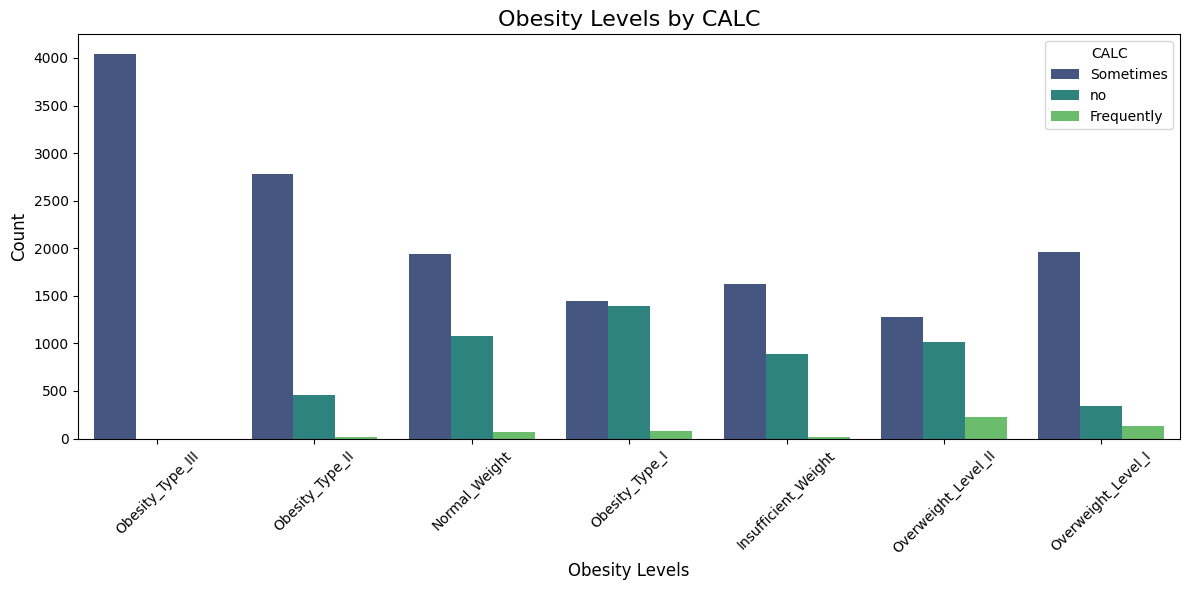

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=train,
    x='NObeyesdad',
    hue='CALC',
    palette='viridis',
    order=train['NObeyesdad'].value_counts().index
)
plt.title('Obesity Levels by CALC', fontsize=16)
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='CALC', loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Across all obesity levels (e.g., Obesity_Type_III, Obesity_Type_II, etc.), the majority of individuals fall under the "Sometimes" category of alcohol consumption
- For Normal Weight, the "no" category has a stronger representation compared to its representation in higher obesity levels like Obesity_Type_III.
- The "Frequently" category has relatively lower counts across all obesity levels. However, there is a noticeable presence in Normal Weight and Obesity_Type_I levels, indicating possible moderation in obesity severity among frequent drinkers.

---
- Which mode of transportation is most commonly associated with higher obesity levels (e.g., Obesity Type III)?

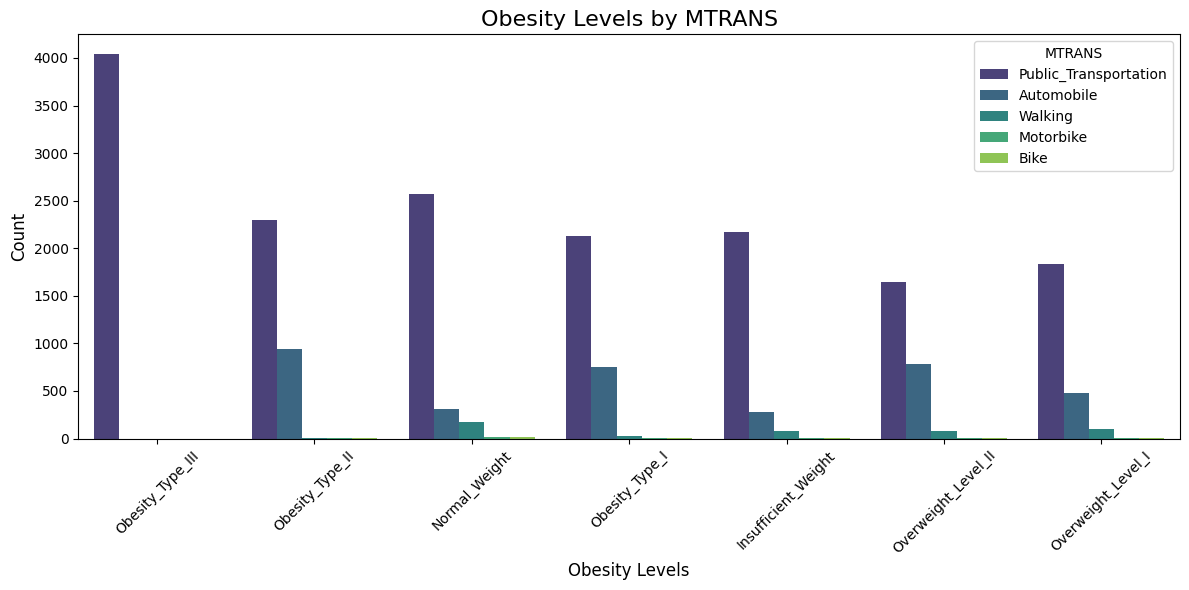

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=train,
    x='NObeyesdad',
    hue='MTRANS',
    palette='viridis',
    order=train['NObeyesdad'].value_counts().index
)
plt.title('Obesity Levels by MTRANS', fontsize=16)
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='MTRANS', loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The chart highlights a potential link between less physically active modes of transportation (public transportation and automobiles) and higher obesity levels.
- Encouraging active transportation like walking or biking could contribute to weight management and overall health improvements.

<Axes: >

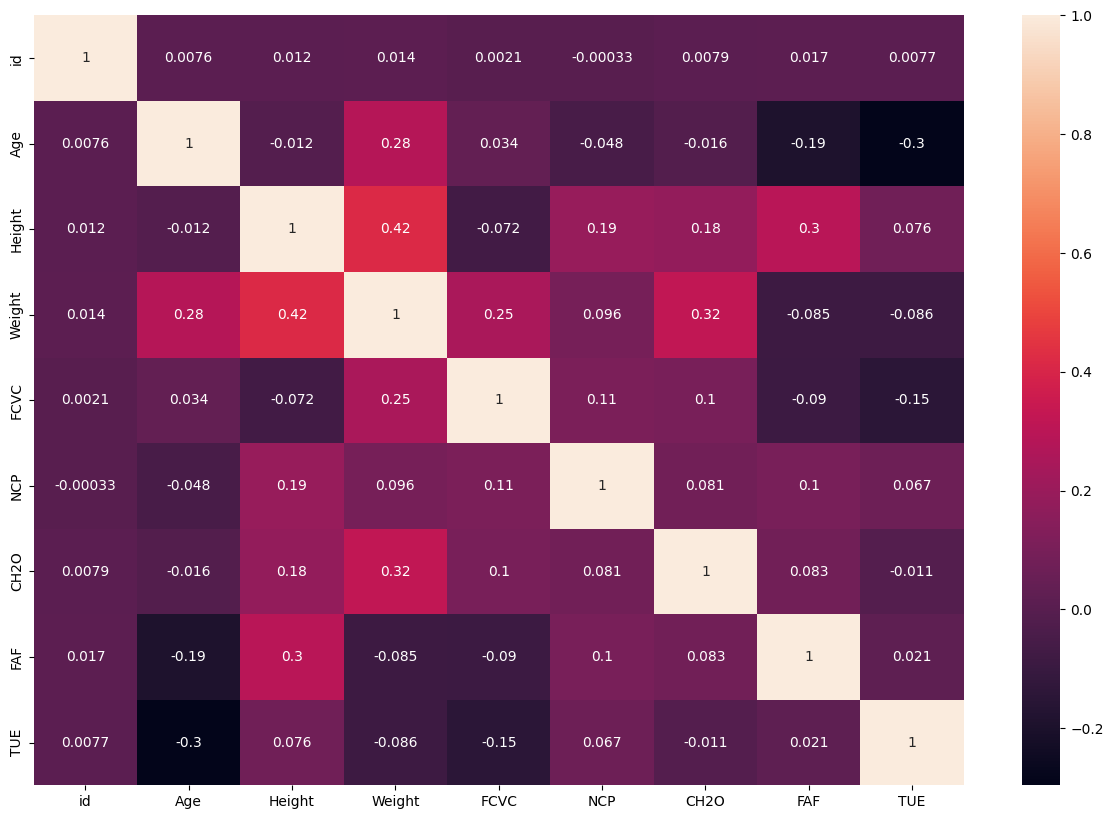

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(numeric_only=True) , annot=True)

# Data Spliting

In [ ]:
X=train.drop('NObeyesdad',axis=1)
y=train['NObeyesdad']

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(16606, 17)

In [ ]:
x_train.drop('id',axis=1,inplace=True)
x_val.drop('id',axis=1,inplace=True)

In [ ]:
x_train.select_dtypes(include='object').columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [ ]:
for i in x_train.select_dtypes(include='object').columns:
    print(i,x_train[i].unique())

Gender ['Male' 'Female']
family_history_with_overweight ['yes' 'no']
FAVC ['yes' 'no']
CAEC ['Always' 'Sometimes' 'no' 'Frequently']
SMOKE ['no' 'yes']
SCC ['no' 'yes']
CALC ['no' 'Sometimes' 'Frequently']
MTRANS ['Automobile' 'Public_Transportation' 'Walking' 'Motorbike' 'Bike']


# Convert categorical data to numerical data

In [ ]:
binary_columns = ['family_history_with_overweight','SMOKE','SCC','FAVC']

for col in binary_columns:
    x_train[col] = x_train[col].str.strip().str.capitalize()
    x_train[col] = x_train[col].map({'Yes': 1, 'No': 0})


In [ ]:
x_train['Gender']=x_train['Gender'].str.strip().str.capitalize()
x_train['Gender']=x_train['Gender'].map({'Male':0,'Female':1})


In [ ]:
one_Encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cols = pd.DataFrame(one_Encoder.fit_transform(x_train[['MTRANS']]))
encoded_cols.columns = one_Encoder.get_feature_names_out([ 'MTRANS'])
x_train = x_train.drop(['MTRANS'], axis=1)
x_train = pd.concat([x_train.reset_index(drop=True), encoded_cols.reset_index(drop=True)], axis=1)


In [ ]:
x_train['CALC'] = x_train['CALC'].str.strip().str.capitalize()
ordinal_encoder = OrdinalEncoder(categories=[['Frequently','No','Sometimes','Always']])
x_train['CALC'] = ordinal_encoder.fit_transform(x_train[['CALC']])


In [ ]:
x_train['CAEC']=x_train['CAEC'].str.strip().str.capitalize()
ordinal_encoder_CAEC = OrdinalEncoder(categories=[['Always','No','Frequently','Sometimes']])
x_train['CAEC'] = ordinal_encoder_CAEC.fit_transform(x_train[['CAEC']])

In [ ]:
x_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,17.000000,1.770000,97.000000,1,1,3.0,3.000000,0.0,0,2.000000,0,3.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0,22.667596,1.753389,54.877111,1,1,2.0,4.000000,3.0,0,2.000000,0,2.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,21.838323,1.819867,122.024954,1,1,3.0,2.880817,3.0,0,1.645338,0,0.739881,0.0,2.0,0.0,0.0,0.0,1.0,0.0
3,1,41.000000,1.580000,80.000000,1,1,2.0,3.000000,3.0,0,1.000000,0,0.000000,0.0,2.0,1.0,0.0,0.0,0.0,0.0
4,0,23.000000,1.800000,95.000000,1,0,3.0,3.000000,3.0,0,3.000000,0,2.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# **Feature Scaling**

In [ ]:
train.select_dtypes(include='number').columns

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[[ 'Age','Height','Weight','FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']])
x_train[['Age','Height','Weight','FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']]=x_train_scaled

In [ ]:
label_encoder =LabelEncoder()
y_train= label_encoder.fit_transform(y_train)

# validation data preprocessing

In [ ]:
binary_columns = ['family_history_with_overweight','SMOKE' ,'SCC', 'FAVC']

for col in binary_columns:
    x_val[col] = x_val[col].str.strip().str.capitalize()
    x_val[col] = x_val[col].map({'Yes': 1, 'No': 0})


In [ ]:
x_val['Gender']=x_val['Gender'].str.strip().str.capitalize()
x_val['Gender']=x_val['Gender'].map({'Male':0,'Female':1})


In [ ]:
encoded_cols = pd.DataFrame(one_Encoder.transform(x_val[['MTRANS']]))
encoded_cols.columns = one_Encoder.get_feature_names_out(['MTRANS'])
x_val = x_val.drop(['MTRANS'], axis=1)
x_val = pd.concat([x_val.reset_index(drop=True), encoded_cols.reset_index(drop=True)], axis=1)


In [ ]:
x_val['CALC'] = x_val['CALC'].str.strip().str.capitalize()
x_val['CALC'] = ordinal_encoder.transform(x_val[['CALC']])


In [ ]:
x_val['CAEC']=x_val['CAEC'].str.strip().str.capitalize()
x_val['CAEC'] = ordinal_encoder_CAEC.transform(x_val[['CAEC']])

In [ ]:
x_val_scaled = scaler.transform(x_val[['Age','Height','Weight','FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']])
x_val[['Age', 'Height','Weight','FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']]=x_val_scaled

In [ ]:
y_val= label_encoder.transform(y_val)

# **Modeling**

## Traditional Machine Learning models

In [ ]:
def evaluate_models(x_train, y_train, x_val, y_val):
    models = {
        'Logistic Regression': LogisticRegression(C=0.1, solver='saga', max_iter=1000),
        'SVM': SVC(C=10, kernel='rbf'),
        'KNN': KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski'),
        'Decision Tree': DecisionTreeClassifier(max_depth=100, min_samples_split=10, criterion='entropy', random_state=42),
    }

    results = []

    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_val)

        acc = accuracy_score(y_val, y_pred)
        prec = precision_score(y_val, y_pred, average='weighted')
        rec = recall_score(y_val, y_pred, average='weighted')
        f1 = f1_score(y_val, y_pred, average='weighted')

        results.append({
            'Model': name,
            'Accuracy': round(acc, 4),
            'Precision': round(prec, 4),
            'Recall': round(rec, 4),
            'F1-score': round(f1, 4)
        })

    results_df = pd.DataFrame(results)
    return results_df


In [ ]:
results=evaluate_models(x_train, y_train, x_val, y_val)
results

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.8425,0.8390,0.8425,0.8402
1,SVM,0.8774,0.8771,0.8774,0.8772
2,KNN,0.7690,0.7680,0.7690,0.7682
3,Decision Tree,0.8560,0.8558,0.8560,0.8557


## Ensemble models

In [ ]:
def evaluate_ensemble_models(x_train, x_val, y_train, y_val):
    results = []
    bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
    bagging.fit(x_train, y_train)
    y_pred = bagging.predict(x_val)
    results.append({
        'Model': 'BaggingClassifier',
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred, average='weighted'),
        'Recall': recall_score(y_val, y_pred, average='weighted'),
        'F1 Score': f1_score(y_val, y_pred, average='weighted'),
        'ROC AUC': roc_auc_score(y_val, bagging.predict_proba(x_val), multi_class='ovr')
    })

    rf = RandomForestClassifier(n_estimators=200, max_depth=100, min_samples_split=10, random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_val)
    results.append({
        'Model': 'RandomForestClassifier',
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred, average='weighted'),
        'Recall': recall_score(y_val, y_pred, average='weighted'),
        'F1 Score': f1_score(y_val, y_pred, average='weighted'),
        'ROC AUC': roc_auc_score(y_val, rf.predict_proba(x_val), multi_class='ovr')
    })


    gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
    gb.fit(x_train, y_train)
    y_pred = gb.predict(x_val)
    results.append({
        'Model': 'GradientBoostingClassifier',
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred, average='weighted'),
        'Recall': recall_score(y_val, y_pred, average='weighted'),
        'F1 Score': f1_score(y_val, y_pred, average='weighted'),
        'ROC AUC': roc_auc_score(y_val, gb.predict_proba(x_val), multi_class='ovr')
    })

    ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
    ada.fit(x_train, y_train)
    y_pred = ada.predict(x_val)
    results.append({
        'Model': 'AdaBoostClassifier',
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred, average='weighted'),
        'Recall': recall_score(y_val, y_pred, average='weighted'),
        'F1 Score': f1_score(y_val, y_pred, average='weighted'),
        'ROC AUC': roc_auc_score(y_val, ada.predict_proba(x_val), multi_class='ovr')
    })

    try:
        from xgboost import XGBClassifier
        xgb = XGBClassifier(eval_metric='mlogloss',n_estimators=200,max_depth =3 ,learning_rate=0.1)
        xgb.fit(x_train, y_train)
        y_pred = xgb.predict(x_val)
        results.append({
            'Model': 'XGBoostClassifier',
             'Accuracy': "{:.2f}".format(accuracy_score(y_val, y_pred)),
            'Precision': precision_score(y_val, y_pred, average='weighted'),
            'Recall': recall_score(y_val, y_pred, average='weighted'),
            'F1 Score': f1_score(y_val, y_pred, average='weighted'),
            'ROC AUC': roc_auc_score(y_val, xgb.predict_proba(x_val), multi_class='ovr')
        })
    except ImportError:
        print("XGBoost not installed, skipping XGBClassifier.")

    return pd.DataFrame(results)


In [ ]:
ensemble_results = evaluate_ensemble_models(x_train, x_val, y_train, y_val)
ensemble_results


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,BaggingClassifier,0.890173,0.890906,0.890173,0.890498,0.982753
1,RandomForestClassifier,0.898121,0.898209,0.898121,0.897914,0.987105
2,GradientBoostingClassifier,0.898603,0.898648,0.898603,0.898597,0.986798
3,AdaBoostClassifier,0.677987,0.707186,0.677987,0.652825,0.923316
4,XGBoostClassifier,0.91,0.906175,0.906069,0.906053,0.989161


In [ ]:

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10,20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5], # minimum loss reduction
    'min_child_weight': [1, 3, 5]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

random_search.fit(x_train, y_train)
print("Best Parameters:", random_search.best_params_)

# Evaluate new model
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_val)
print("Accuracy = {:.2f}".format(accuracy_score(y_val, y_pred)))
print(classification_report(y_val, y_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.8}
Accuracy = 0.91
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       524
           1       0.88      0.91      0.89       626
           2       0.89      0.87      0.88       543
           3       0.98      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.80      0.79      0.79       484
           6       0.80      0.82      0.81       514

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



## Multilayer Perceptron Classifier

In [ ]:
def train_evaluate_mlp(x_train, y_train, x_val, y_val):
    # Make sure target is flattened
    y_train = y_train.ravel()
    y_val = y_val.ravel()

    # Initialize MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes=(128, 64),  # You can tune this
                        activation='relu',
                        solver='adam',
                        max_iter=100,
                        random_state=42)

    # Fit the model
    mlp.fit(x_train, y_train)

    # Predict
    y_pred = mlp.predict(x_val)

    # Evaluate
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred, average='weighted')
    rec = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    print("=== Classification Report ===")
    print(classification_report(y_val, y_pred))

    # Return metrics as a DataFrame
    results_df = pd.DataFrame({
        'Model': ['MLPClassifier'],
        'Accuracy': [acc],
        'Precision': [prec],
        'Recall': [rec],
        'F1 Score': [f1]
    })

    return results_df


In [ ]:
mlp_results = train_evaluate_mlp(x_train, y_train, x_val, y_val)
print(mlp_results)


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       524
           1       0.85      0.83      0.84       626
           2       0.86      0.86      0.86       543
           3       0.97      0.96      0.97       657
           4       1.00      1.00      1.00       804
           5       0.71      0.75      0.73       484
           6       0.75      0.75      0.75       514

    accuracy                           0.88      4152
   macro avg       0.87      0.87      0.87      4152
weighted avg       0.88      0.88      0.88      4152

           Model  Accuracy  Precision    Recall  F1 Score
0  MLPClassifier  0.878613   0.879814  0.878613  0.879116


## VotingClassifier

In [ ]:
# Flatten labels if needed
y_train_v = y_train.ravel()
y_val_v = y_val.ravel()

# Initialize classifiers
sgd = SGDClassifier(loss='hinge', max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svc = SVC(kernel='linear', probability=True)

# Voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('sgd', sgd),
        ('rf', rf),
        ('svc', svc)
    ],
    voting='hard'
)

# Train
voting_clf.fit(x_train, y_train_v)

# Predict
y_pred = voting_clf.predict(x_val)

# Evaluate
print(f"Accuracy = {accuracy_score(y_val_v, y_pred):.2f}")
print(classification_report(y_val_v, y_pred))


Accuracy = 0.87
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       524
           1       0.80      0.82      0.81       626
           2       0.78      0.87      0.82       543
           3       0.96      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.80      0.67      0.73       484
           6       0.80      0.72      0.76       514

    accuracy                           0.87      4152
   macro avg       0.86      0.86      0.86      4152
weighted avg       0.87      0.87      0.87      4152



# Test data

In [ ]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [ ]:
x_test=test.drop('id',axis=1)


In [ ]:
binary_columns = ['family_history_with_overweight','SMOKE' ,'SCC', 'FAVC']

for col in binary_columns:
    x_test[col] = x_test[col].str.strip().str.capitalize()
    x_test[col] = x_test[col].map({'Yes': 1, 'No': 0})


In [ ]:
x_test['Gender']=x_test['Gender'].str.strip().str.capitalize()
x_test['Gender']=x_test['Gender'].map({'Male':0,'Female':1})


In [ ]:
encoded_cols = pd.DataFrame(one_Encoder.transform(x_test[['MTRANS']]))
encoded_cols.columns = one_Encoder.get_feature_names_out(['MTRANS'])
x_test = x_test.drop(['MTRANS'], axis=1)
x_test = pd.concat([x_test.reset_index(drop=True), encoded_cols.reset_index(drop=True)], axis=1)


In [ ]:
x_test['CALC'] = x_test['CALC'].str.strip().str.capitalize()
x_test['CALC'] = ordinal_encoder.transform(x_test[['CALC']])


In [ ]:
x_test['CAEC']=x_test['CAEC'].str.strip().str.capitalize()
x_test['CAEC'] = ordinal_encoder_CAEC.transform(x_test[['CAEC']])

In [ ]:
x_test_scaled = scaler.transform(x_test[['Age','Height','Weight','FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']])
x_test[['Age', 'Height','Weight','FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']]=x_test_scaled

In [ ]:
x_test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,0.523232,1.699064,1.241703,1,1,0.928961,0.338791,3.0,0,1.312224,0,-0.155010,-1.025610,2.0,0.0,0.0,0.0,1.0,0.0
1,1,-0.503362,-1.149551,-0.834075,1,1,-0.832617,-2.502790,3.0,0,1.599379,0,0.016924,-1.025610,2.0,0.0,0.0,0.0,1.0,0.0
2,1,0.366650,-0.652150,0.898161,1,1,1.044165,0.338791,3.0,0,0.976684,0,-1.172105,-0.610945,2.0,0.0,0.0,0.0,1.0,0.0
3,0,-0.506972,-1.687313,0.596868,1,1,-0.832617,0.307405,3.0,0,1.247650,0,-1.059325,-1.025610,2.0,0.0,0.0,0.0,1.0,0.0
4,1,0.366650,-0.835243,0.641170,1,1,1.044165,0.338791,3.0,0,1.028812,0,-1.172105,0.201110,2.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
y_pred = best_model.predict(x_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)
submission_df = pd.DataFrame({'id': test['id'], 'NObeyesdad': y_pred_labels})

# Save to a CSV file
submission_df.to_csv('submission.csv', index=False)


# **Our Score**: 🔥   

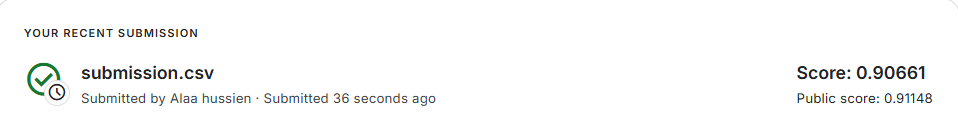

In [ ]:
# from kaggle submission
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/score.png')
cv2_imshow(img)
